In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from datetime import datetime
import pandas as pd

from goes2go.rgb import *
from goes2go.data import goes_latest, goes_nearesttime
from goes2go.tools import abi_crs

In [3]:
DATE = datetime(2021, 4, 23, 11, 20)
G16 = goes_nearesttime(attime=DATE, satellite=16, product='ABI')
#G17 = goes_nearesttime(attime=DATE, satellite=17, product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/home/ac.jcorner/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [4]:
G16[list(G16)[0]]

<xarray.DataArray 'CMI_C01' (y: 1500, x: 2500)>
[3750000 values with dtype=float32]
Coordinates:
    t                    datetime64[ns] ...
  * y                    (y) float32 0.1282 0.1282 0.1281 ... 0.04432 0.04427
  * x                    (x) float32 -0.1013 -0.1013 -0.1012 ... 0.03856 0.03861
    y_image              float32 ...
    x_image              float32 ...
    dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G16_s20211131121139_e20211...
    date_created         <U22 '2021-04-23T11:24:01.4Z'
    time_coverage_start  <U22 '2021-04-23T11:21:13.9Z'
    time_coverage_end    <U22 '2021-04-23T11:23:51.7Z'
Attributes:
    long_name:              ABI Cloud and Moisture Imagery reflectance factor
    standard_name:          toa_lambertian_equivalent_albedo_multiplied_by_co...
    sensor_band_bit_depth:  10
    downsampling_method:    average
    valid_range:            [   0 4095]
    units:                  1
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: sum (interval: 0.000028 rad)
    ancillary_variables:    DQF_C01

In [5]:
print(DATE)
print(f"{DATE:%Y_%m_%d_%H}")

2021-04-23 11:20:00
2021_04_23_11


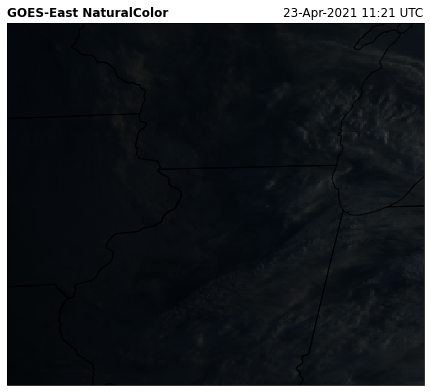

In [6]:
functions = [NaturalColor]

str_date_16 = f"{pd.to_datetime(G16.time_coverage_start.item()):%d-%b-%Y %H:%M UTC}"
time = f"{pd.to_datetime(G16.time_coverage_start.item()):%d_%b_%Y_%H:%M}"
#str_date_17 = f"{pd.to_datetime(G16.time_coverage_start.item()):%d-%b-%Y %H:%M UTC}"

for i, func in enumerate(functions):
    fig = plt.figure(figsize=(15, 12))

    #RGB17 = func(G17)
    RGB16 = func(G16)
    
    # Create axis with Geostationary projection
    #ax17 = fig.add_subplot(1, 2, 1, projection=RGB17.crs)
    ax16 = fig.add_subplot(1, 2, 2, projection=RGB16.crs)

    # Add common features to map (coastlines and state borders)
    #common_features(ax=ax16, STATES=True)
    #common_features(ax=ax17, STATES=True)
    
    # GOES-West
    #ax17.set_title(f'GOES-West {func.__name__}', loc='left', fontweight='bold')
    #ax17.set_title(f'{str_date_17}', loc='right')
    #ax17.imshow(RGB17[list(RGB17)[0]], **RGB17.imshow_kwargs)
    
    # GOES-East
    ax16.set_extent([-92, -87, 39, 45], crs=ccrs.PlateCarree())
    ax16.set_title(f'GOES-East {func.__name__}', loc='left', fontweight='bold')
    ax16.set_title(f'{str_date_16}', loc='right')
    ax16.imshow(RGB16[list(RGB16)[0]], **RGB16.imshow_kwargs)
    ax16.coastlines(resolution='50m', color='black', linewidth=2)
    ax16.add_feature(ccrs.cartopy.feature.STATES)
    
    plt.subplots_adjust(wspace=0.01)
   # plt.savefig(f'{func.__name__}', bbox_inches='tight')

In [69]:
print(time)

23-Apr-2021_11:21Z
